<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/Methodology/paper_method_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import io
from pathlib import Path
import numpy as np
import re
import shutil
import pickle


import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/Analysis of Turizm Journals raw 22.06.2020.xlsx", sheet_name=None, usecols="A:AF", header=1)
df_1.keys()
del df_1["General Information"]
df_1 = pd.concat(df_1)
df_1

AU  \
IJCHM 0        Ineson, EM; Comic, D; Kalmic, L   
      1                    Benitez-Aurioles, B   
      2               Hu, XB; Yang, Y; Park, S   
      3    Ahmat, NHC; Arendt, SW; Russell, DW   
      4                    Kim, EL; Tanford, S   
...                                        ...   
JHMM  226                           Morosan, C   
      227             Memarzadeh, F; Chang, HJ   
      228                       Cao, Y; Kim, K   
      229                                  NaN   
      230                                  NaN   

                                                          TI      PY  \
IJCHM 0    Towards a hierarchy of hotel guests' in-room n...  2019.0   
      1    Barcelona's peer-to-peer tourist accommodation...  2019.0   
      2    A meta-regression on the effect of online rati...  2019.0   
      3    Examining work factors after Malaysia's minimu...  2019.0   
      4    Seeking reward or avoiding risk from restauran...  2019.0   
...                                                      ...     ...   
JHMM  226  The Influence of DMO Advertising on Specific D...  2015.0   
      227  Online Consumer Complaints About Southeast Asi...  2015.0   
      228  How Do Customers Perceive Service Quality in D...  2015.0   
      229                                                NaN     NaN   
      230                                                NaN     NaN   

                                     DI QUALITATIVE (0)\nQUANTITATIVE (1)  \
IJCHM 0      10.1108/IJCHM-01-2019-0061                                 0   
      1      10.1108/IJCHM-01-2019-0090                                 1   
      2      10.1108/IJCHM-10-2018-0835                                 0   
      3      10.1108/IJCHM-10-2018-0827                                 1   
      4      10.1108/IJCHM-03-2018-0235                                 1   
...                                 ...                               ...   
JHMM  226  10.1080/19368623.2014.891962                                 1   
      227  10.1080/19368623.2014.893222                                 0   
      228  10.1080/19368623.2014.903817                                 1   
      229                           NaN                               NaN   
      230                           NaN                               NaN   

                     Method  category  CMB  CMV   MB  ...  CBQO  DBQ  UEB  \
IJCHM 0      pheneomenology  CMB-free    0    0  0.0  ...   0.0  0.0  0.0   
      1      secondary data  CMB-free    1    0  0.0  ...   0.0  0.0  0.0   
      2              review  CMB-free    0    0  0.0  ...   0.0  0.0  0.0   
      3              survey  CMB-risk    0    0  0.0  ...   0.0  0.0  0.0   
      4        experimental  CMB-free    0    0  0.0  ...   0.0  0.0  0.0   
...                     ...       ...  ...  ...  ...  ...   ...  ...  ...   
JHMM  226            survey  CMB-risk    0    0  0.0  ...   0.0  0.0  0.0   
      227  content analysis  CMB-free  NaN  NaN  NaN  ...   NaN  NaN  NaN   
      228            survey  CMB-risk    0    0  0.0  ...   0.0  0.0  0.0   
      229               NaN       NaN  NaN  NaN  NaN  ...   NaN  NaN  NaN   
      230               NaN       NaN  NaN  NaN  NaN  ...   NaN  NaN  NaN   

           HSF  PSD  MV.1  GFS  DMLMF  SULMF  Unnamed: 31  
IJCHM 0    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      1    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      2    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      3    0.0  0.0   0.0  0.0    1.0    0.0          NaN  
      4    0.0  0.0   0.0  0.0    0.0    0.0          NaN  
...        ...  ...   ...  ...    ...    ...          ...  
JHMM  226  0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      227  NaN  NaN   NaN  NaN    NaN    NaN          NaN  
      228  0.0  0.0   0.0  0.0    0.0    0.0          NaN  
      229  NaN  NaN   NaN  NaN    NaN    NaN          NaN  
      230  NaN  NaN   NaN  NaN    NaN    NaN          NaN  

[3280 r

In [ ]:
df_1 = df_1.dropna(how="all") 

In [ ]:
df_1 = df_1.reset_index(level=0)

In [ ]:
df_1.rename(columns={'level_0': 'JO'}, inplace=True)

In [ ]:
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1

,JO,AU,TI,PY,DI,QUALITATIVE (0)\nQUANTITATIVE (1),Method,category,CMB,CMV,...,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF,Unnamed: 31
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,pheneomenology,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_1.isnull().sum()

JO                                      0
AU                                      0
TI                                      0
PY                                     19
DI                                      1
QUALITATIVE (0)\nQUANTITATIVE (1)       3
Method                                  0
category                                0
CMB                                   616
CMV                                   620
MB                                    617
MV                                    618
MSD                                   621
MR                                    623
SR                                    621
SED                                   623
MED                                   621
TSM                                   612
TLD                                   614
PSM                                   618
MSM                                   617
A                                     595
C                                     600
CBQO                              

In [ ]:
df_1.drop("Unnamed: 31", axis=1, inplace=True)

In [ ]:
df_1.columns

Index(['JO', 'AU', 'TI', 'PY', 'DI', 'QUALITATIVE (0)\nQUANTITATIVE (1)',
       'Method', 'category', 'CMB', 'CMV', 'MB', 'MV', 'MSD', 'MR', 'SR',
       'SED', 'MED', 'TSM', 'TLD', 'PSM', 'MSM', 'A', 'C', 'CBQO', 'DBQ',
       'UEB', 'HSF', 'PSD', 'MV.1', 'GFS', 'DMLMF', 'SULMF'],
      dtype='object')

In [ ]:
df_1.rename(columns={'QUALITATIVE (0)\nQUANTITATIVE (1)':'QUANTITATIVE'}, inplace=True)

In [ ]:
df_1.QUANTITATIVE.value_counts()

1                     2653
0                      610
              1-0        1
              1-0        1
BOTH(1)                  1
Name: QUANTITATIVE, dtype: int64

In [ ]:
df_1.QUANTITATIVE.unique()

array([0, 1, 'BOTH(1)', '              1-0 ', '              1-0', nan],
      dtype=object)

In [ ]:
df_1.loc[df_1.QUANTITATIVE.isin(['              1-0 ', '              1-0']), "QUANTITATIVE"]="BOTH(1)"

In [ ]:
df_1.QUANTITATIVE.value_counts()

1          2653
0           610
BOTH(1)       3
Name: QUANTITATIVE, dtype: int64

In [ ]:
sns.set()

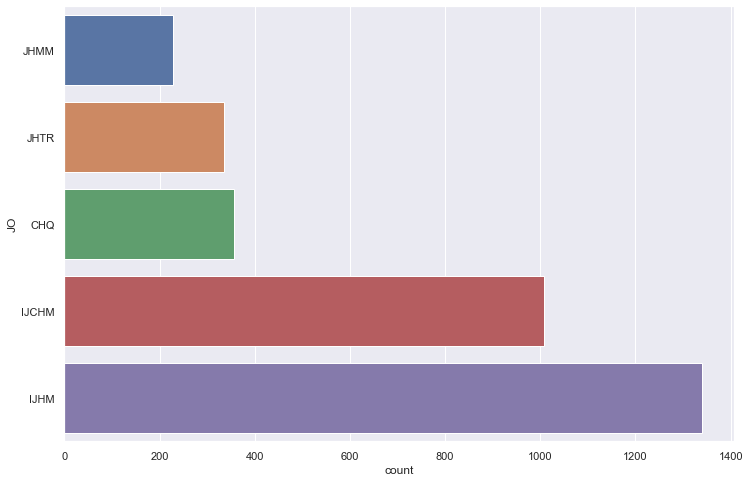

In [ ]:
order = df_1.JO.value_counts(ascending=True).index
plt.figure(figsize=(12,8))
sns.countplot(y='JO', data=df_1, orient='h', order=order);

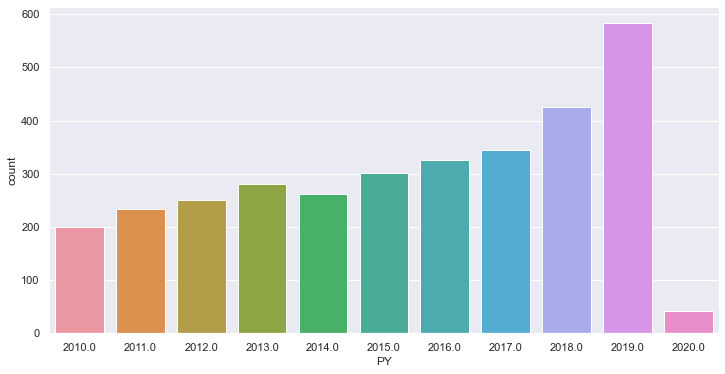

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='PY', data=df_1, orient='v');

In [ ]:
pd.crosstab(df_1.JO, df_1.PY, dropna=False)

PY,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
JO,,,,,,,,,,,
CHQ,35,47,31,35,35,33,33,28,34,29,13
IJCHM,56,53,52,55,63,86,115,137,172,217,2
IJHM,83,110,144,167,139,131,107,97,124,238,0
JHMM,0,0,0,0,0,35,42,44,42,40,14
JHTR,26,24,24,23,24,17,29,39,54,60,12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


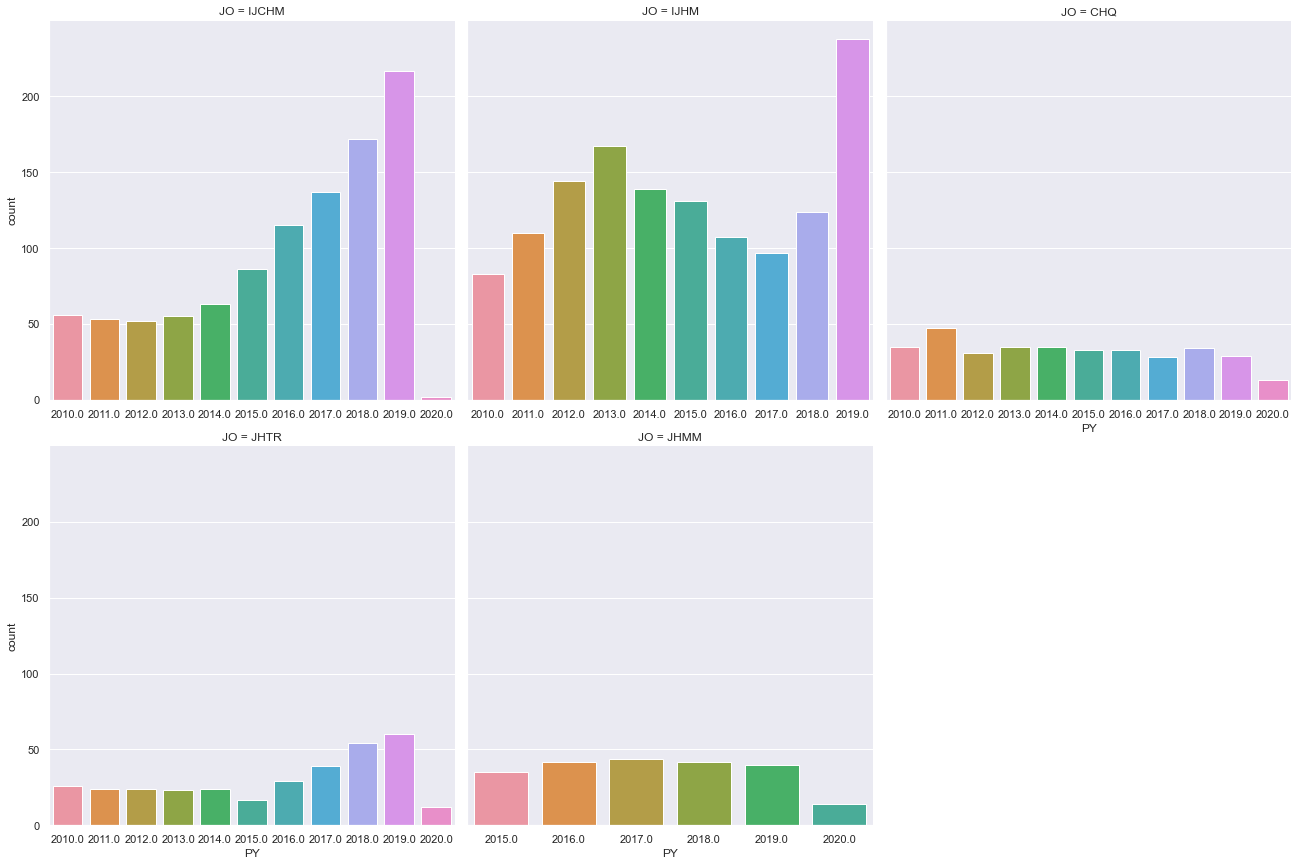

In [ ]:
sns.set(font_scale=1)
sns.catplot(data=df_1, x='PY', col="JO", col_wrap=3, sharex=False, height=6, kind='count');

In [ ]:
df_1.QUANTITATIVE.value_counts()

1          2653
0           610
BOTH(1)       3
Name: QUANTITATIVE, dtype: int64

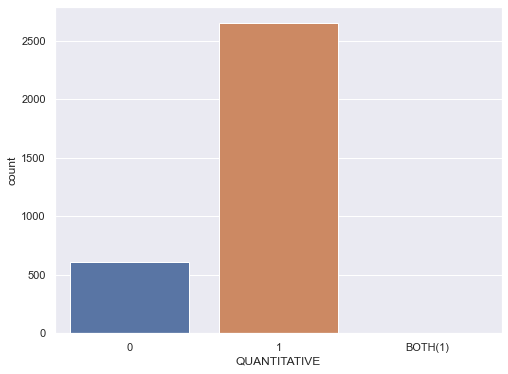

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='QUANTITATIVE', data=df_1);

In [ ]:
df_1.Method.value_counts().head(60)

survey                                        1509
secondary data                                 329
experimental                                   305
panel                                          206
qualitative                                    187
review                                         159
content analysis                               109
mixed                                          109
case study                                     101
experiment                                      36
scale development                               36
theoretical                                     32
grounded theory                                 18
opinion                                          9
bibliometrics                                    9
panel                                            8
pheneomenology                                   8
bibliometric                                     7
theoretical                                      6
sna                            

In [ ]:
df_1["Method"] = df_1.Method.str.strip().str.lower()

In [ ]:
m_sort = sorted(df_1.Method.unique())
m_sort

['bibliometric',
 'bibliometric analyses,co-citation analysis',
 'bibliometrics',
 'case study',
 'commentary',
 'content analysis',
 'delphi',
 'essay',
 'ethnographic',
 'ethnography',
 'etnografic',
 'etnographic',
 'experiemental',
 'experiment',
 'experimental',
 'field study',
 'grounded theory',
 'interview',
 'meta-analyis',
 'meta-analyses',
 'meta-analysis',
 'mixed',
 'mixed(exp+surv)',
 'mixed(int+ca)',
 'mixed(int+exp)',
 'netnography',
 'opinion',
 'panel',
 'phenemenology',
 'phenemology',
 'phenemonology',
 'pheneomenology',
 'phenomenology',
 'qualitative',
 'research note',
 'reviev',
 'review',
 'reviews',
 'scale development',
 'scale development (survey)',
 'scale devolopment',
 'secondary data',
 'sna',
 'surver',
 'survey',
 'survey+sd',
 'suvey',
 'textual analysis',
 'theoratical',
 'theoretica',
 'theoretical',
 'theoritical',
 'thereotical']

In [ ]:
print(m_sort, len(m_sort))

['bibliometric', 'bibliometric analyses,co-citation analysis', 'bibliometrics', 'case study', 'commentary', 'content analysis', 'delphi', 'essay', 'ethnographic', 'ethnography', 'etnografic', 'etnographic', 'experiemental', 'experiment', 'experimental', 'field study', 'grounded theory', 'interview', 'meta-analyis', 'meta-analyses', 'meta-analysis', 'mixed', 'mixed(exp+surv)', 'mixed(int+ca)', 'mixed(int+exp)', 'netnography', 'opinion', 'panel', 'phenemenology', 'phenemology', 'phenemonology', 'pheneomenology', 'phenomenology', 'qualitative', 'research note', 'reviev', 'review', 'reviews', 'scale development', 'scale development (survey)', 'scale devolopment', 'secondary data', 'sna', 'surver', 'survey', 'survey+sd', 'suvey', 'textual analysis', 'theoratical', 'theoretica', 'theoretical', 'theoritical', 'thereotical'] 53


In [ ]:
df_1 = df_1.replace(dict.fromkeys(['bibliometric', 'bibliometric analyses,co-citation analysis', 'bibliometrics'], 'bibliometric'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['ethnographic', 'ethnography', 'etnografic', 'etnographic', 'netnography'], 'ethnography'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['experiemental','experimental','experiment'], 'experimental'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['meta-analyis', 'meta-analyses', 'meta-analysis'], 'meta-analysis'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['mixed', 'mixed(exp+surv)', 'mixed(int+ca)', 'mixed(int+exp)'], 'mixed'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['phenemenology', 'phenemology', 'phenemonology', 'pheneomenology', 'phenomenology'], 'phenomenology'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['reviev', 'review', 'reviews'], 'review'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['scale development', 'scale development (survey)', 'scale devolopment'], 'scale development'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['surver', 'survey', 'survey+sd', 'suvey'], 'survey'))

df_1["Method"] = df_1["Method"].replace(dict.fromkeys(['theoratical', 'theoretica', 'theoretical', 'theoritical', 'thereotical'], 'theoretical'))

In [ ]:
df_1["Method"].unique()

array(['phenomenology', 'secondary data', 'review', 'survey',
       'experimental', 'panel', 'content analysis', 'bibliometric',
       'qualitative', 'meta-analysis', 'delphi', 'mixed', 'case study',
       'theoretical', 'scale development', 'textual analysis',
       'ethnography', 'grounded theory', 'interview', 'research note',
       'sna', 'essay', 'opinion', 'commentary', 'field study'],
      dtype=object)

In [ ]:
df_1["Method"].nunique()

25

In [ ]:
df_1["Method"].value_counts()

survey               1517
experimental          348
secondary data        331
panel                 214
qualitative           187
review                162
mixed                 115
content analysis      110
case study            101
theoretical            46
scale development      41
grounded theory        18
bibliometric           18
phenomenology          15
ethnography             9
opinion                 9
meta-analysis           7
sna                     5
delphi                  5
textual analysis        4
commentary              2
research note           2
interview               1
essay                   1
field study             1
Name: Method, dtype: int64

In [ ]:
df_1["Method"] = df_1["Method"].replace('panel', 'secondary data')

In [ ]:
df_1["Method"].value_counts()

survey               1517
secondary data        545
experimental          348
qualitative           187
review                162
mixed                 115
content analysis      110
case study            101
theoretical            46
scale development      41
grounded theory        18
bibliometric           18
phenomenology          15
opinion                 9
ethnography             9
meta-analysis           7
sna                     5
delphi                  5
textual analysis        4
commentary              2
research note           2
interview               1
field study             1
essay                   1
Name: Method, dtype: int64

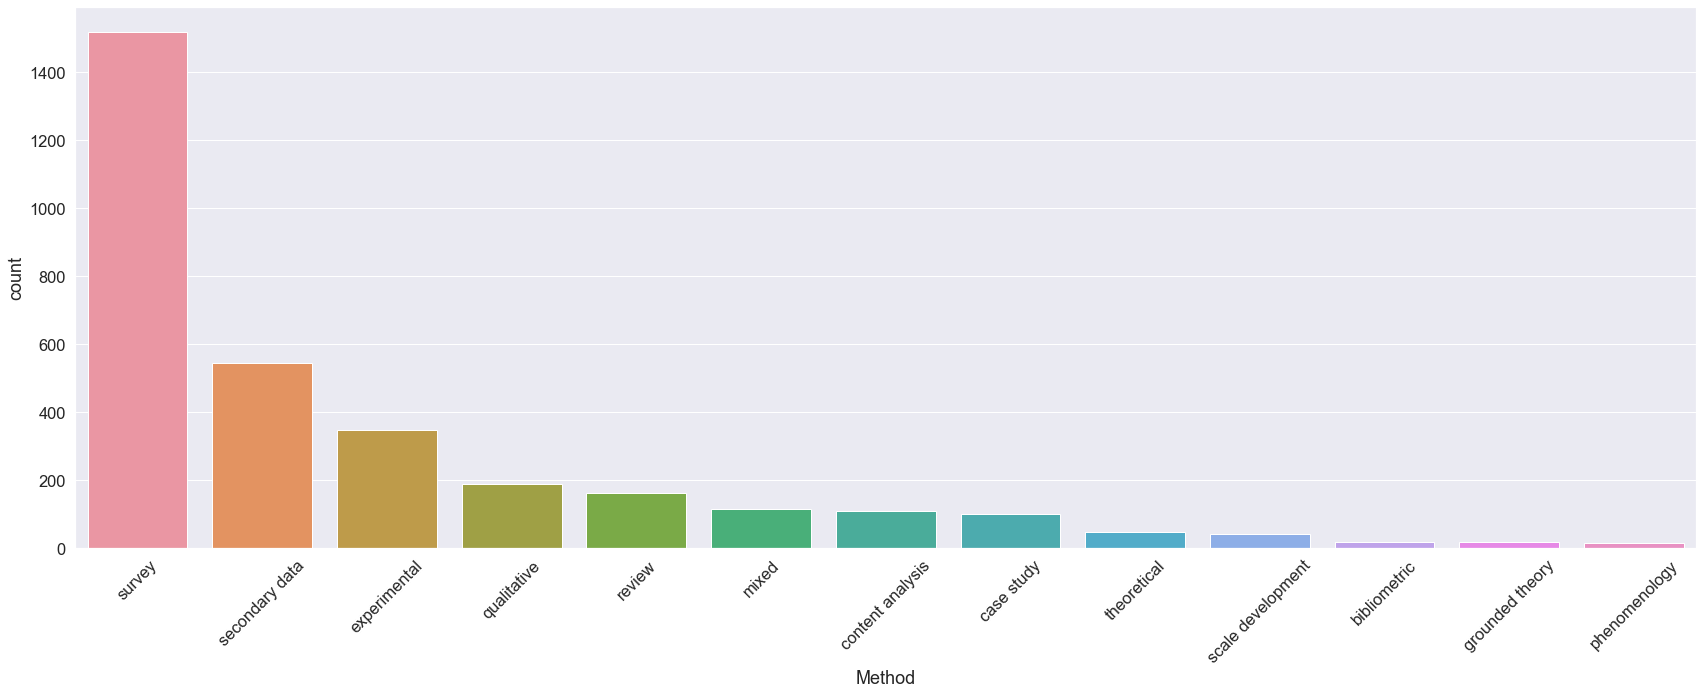

In [ ]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=1.5)

plt.figure(figsize=(24,10))
sns.countplot(x='Method', data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), order=order);

plt.xticks(rotation=45)
plt.tight_layout()

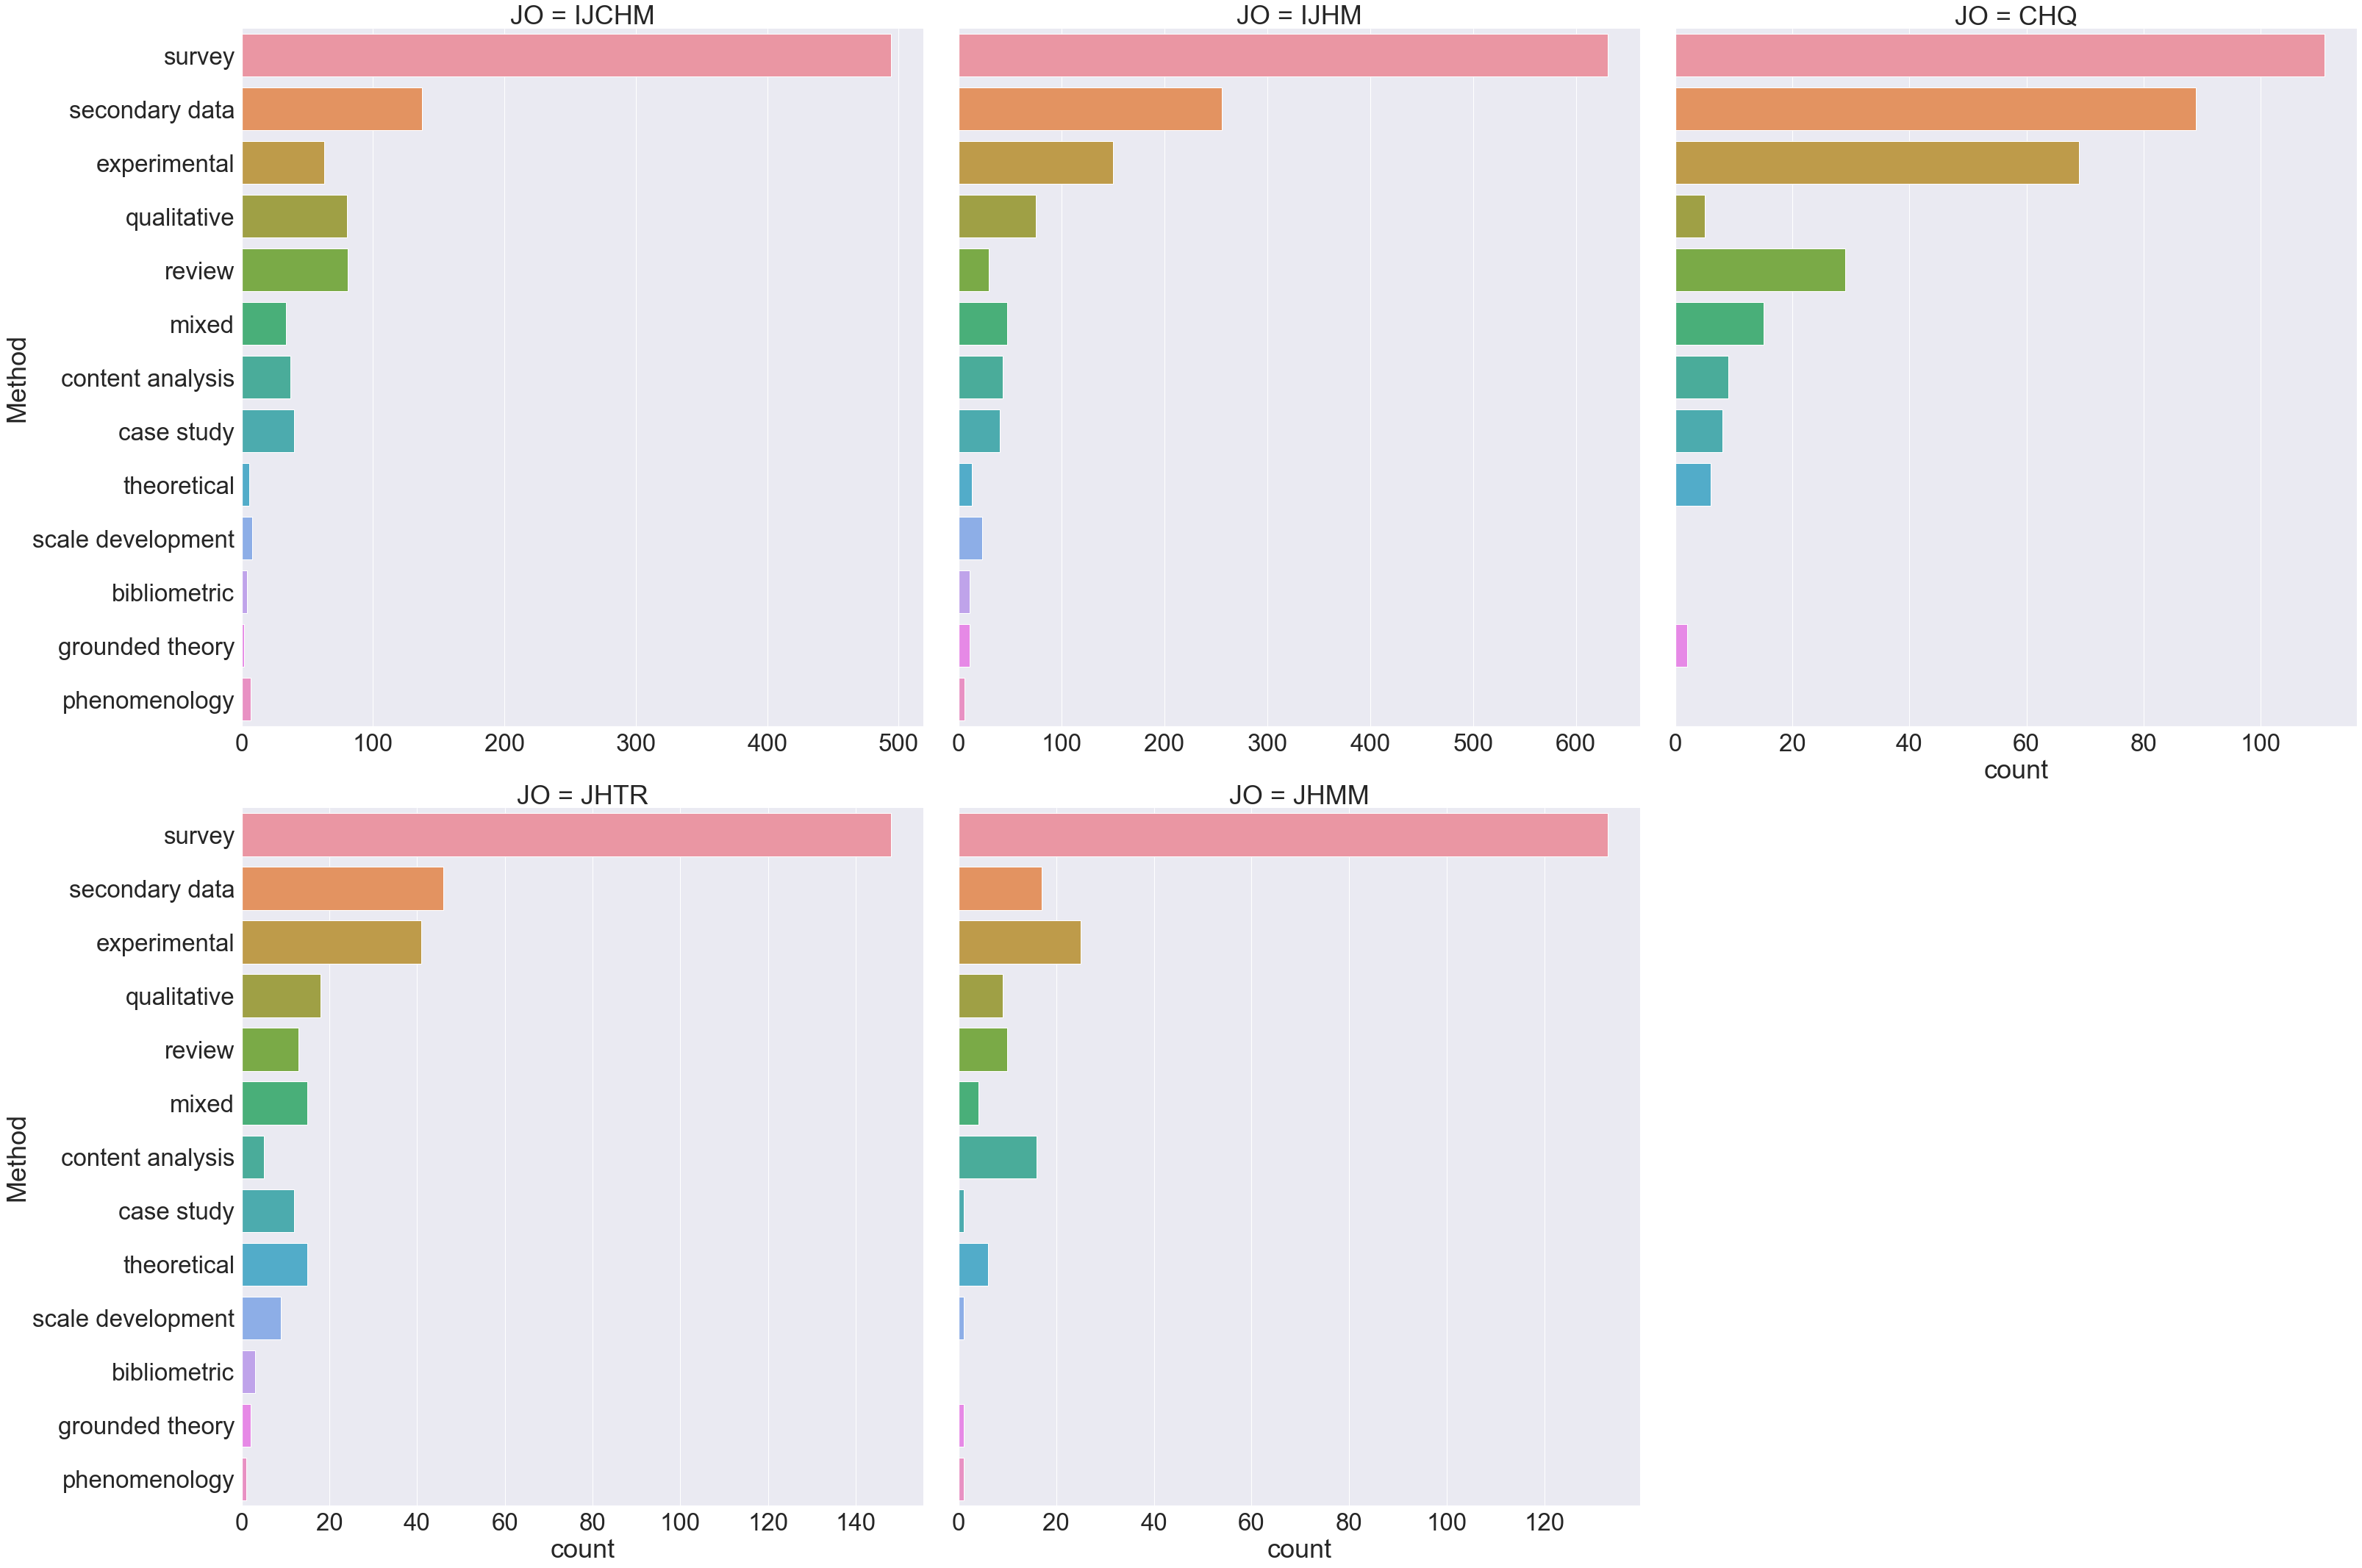

In [ ]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=3)

# plt.figure(figsize=(40,25))

sns.catplot(y="Method", col="JO",
                data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), kind="count", col_wrap=3,
                order=order, height=15, aspect=1, sharex=False);


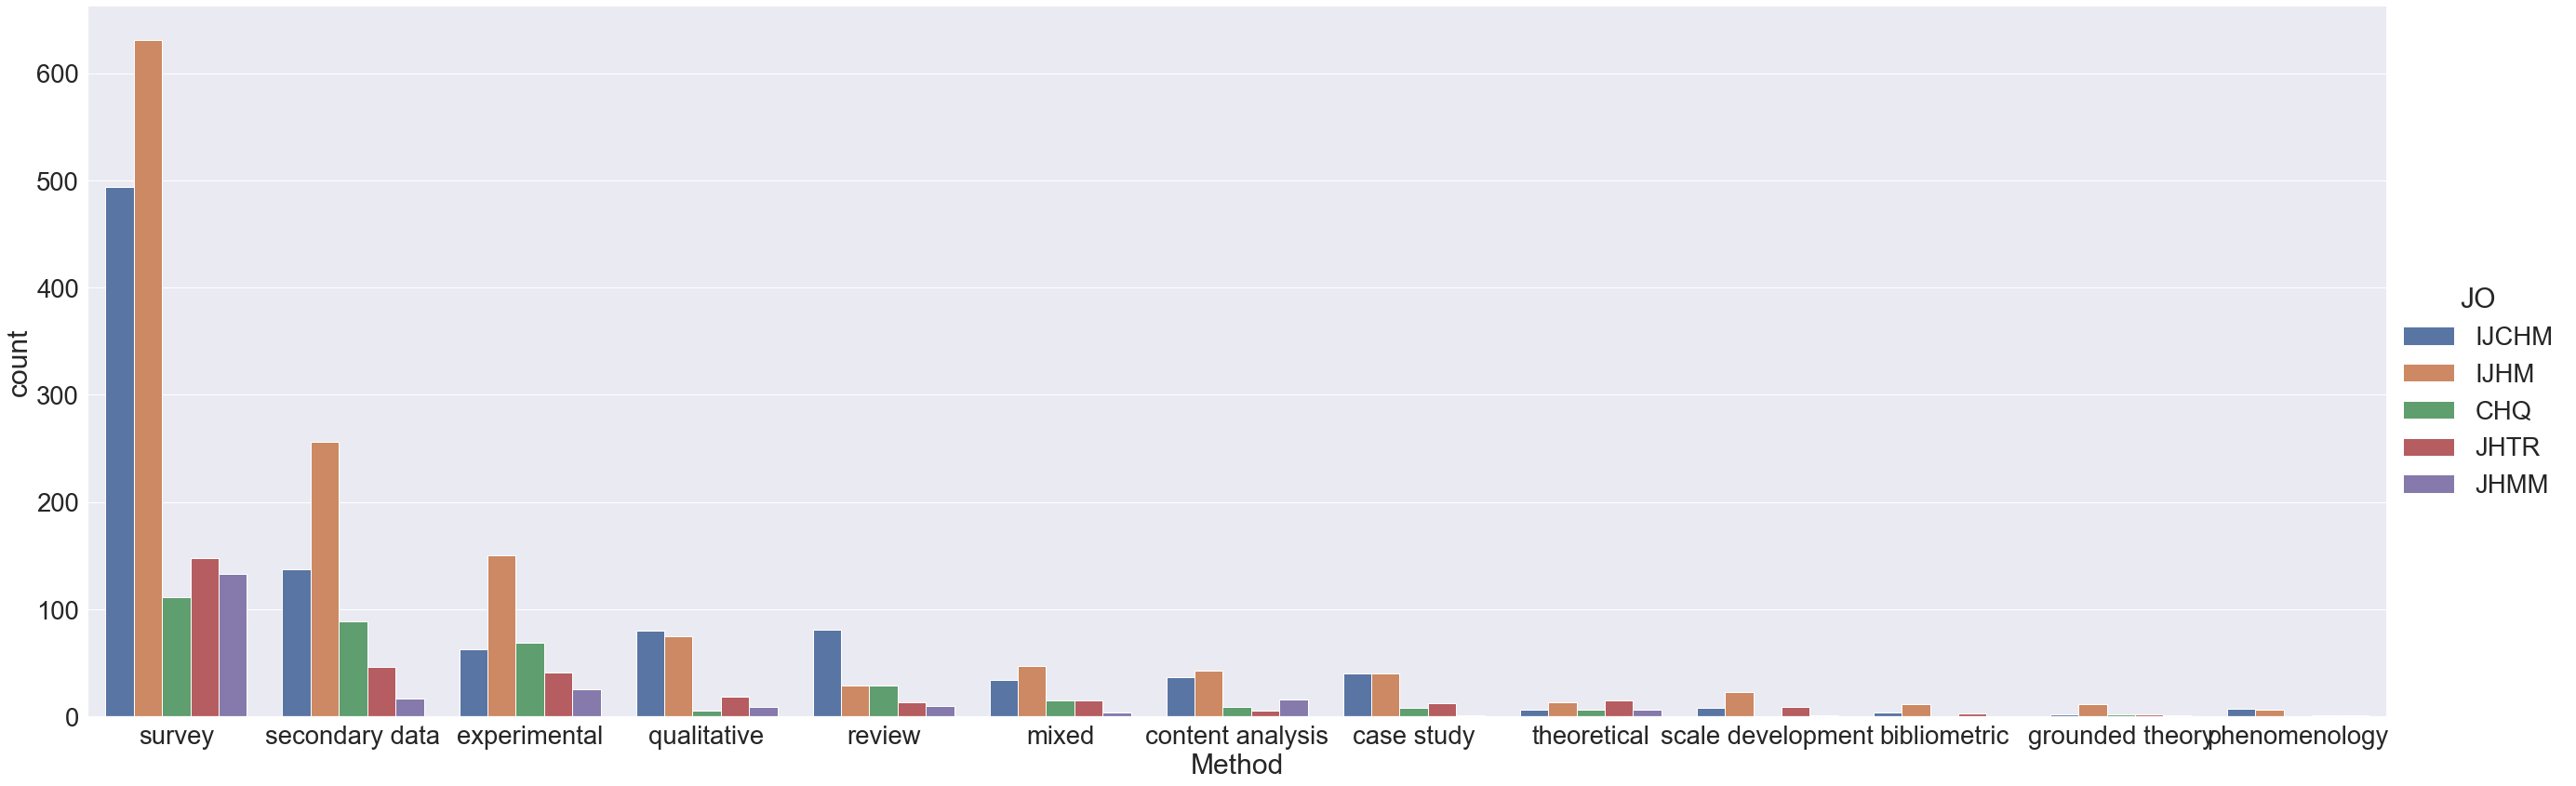

In [ ]:
order = df_1.groupby('Method').filter(lambda x: len(x) >= 10)["Method"].value_counts().index
sns.set(font_scale=2.5)

# plt.figure(figsize=(40,25))

sns.catplot(x="Method", hue="JO",
                data=df_1.groupby('Method').filter(lambda x: len(x) >= 10), kind="count", 
                order=order, height=12, aspect=3);

In [ ]:
df_filtered = df_1.groupby('Method').filter(lambda x: len(x) >= 10)
df_filtered

,JO,AU,TI,PY,DI,QUANTITATIVE,Method,category,CMB,CMV,...,C,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,phenomenology,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_gr = df_filtered.groupby("JO")["Method"].value_counts()
df_gr

JO    Method           
CHQ   survey               111
      secondary data        89
      experimental          69
      review                29
      mixed                 15
                          ... 
JHTR  scale development      9
      content analysis       5
      bibliometric           3
      grounded theory        2
      phenomenology          1
Name: Method, Length: 61, dtype: int64

In [ ]:
df_gr = df_gr.reset_index(name="Percentage")

In [ ]:
df_gr['Percentage'] = df_gr['Percentage'].div(df_gr.groupby('JO')['Percentage'].transform(sum))*100
print(df_gr)

      JO             Method  Percentage
0    CHQ             survey   32.361516
1    CHQ     secondary data   25.947522
2    CHQ       experimental   20.116618
3    CHQ             review    8.454810
4    CHQ              mixed    4.373178
..   ...                ...         ...
56  JHTR  scale development    2.743902
57  JHTR   content analysis    1.524390
58  JHTR       bibliometric    0.914634
59  JHTR    grounded theory    0.609756
60  JHTR      phenomenology    0.304878

[61 rows x 3 columns]


In [ ]:
# sns.set(font_scale=1)

# plt.figure(figsize=(25,15))

# sns.barplot(x="Method", y="Percentage", data=df_gr, hue = "JO");

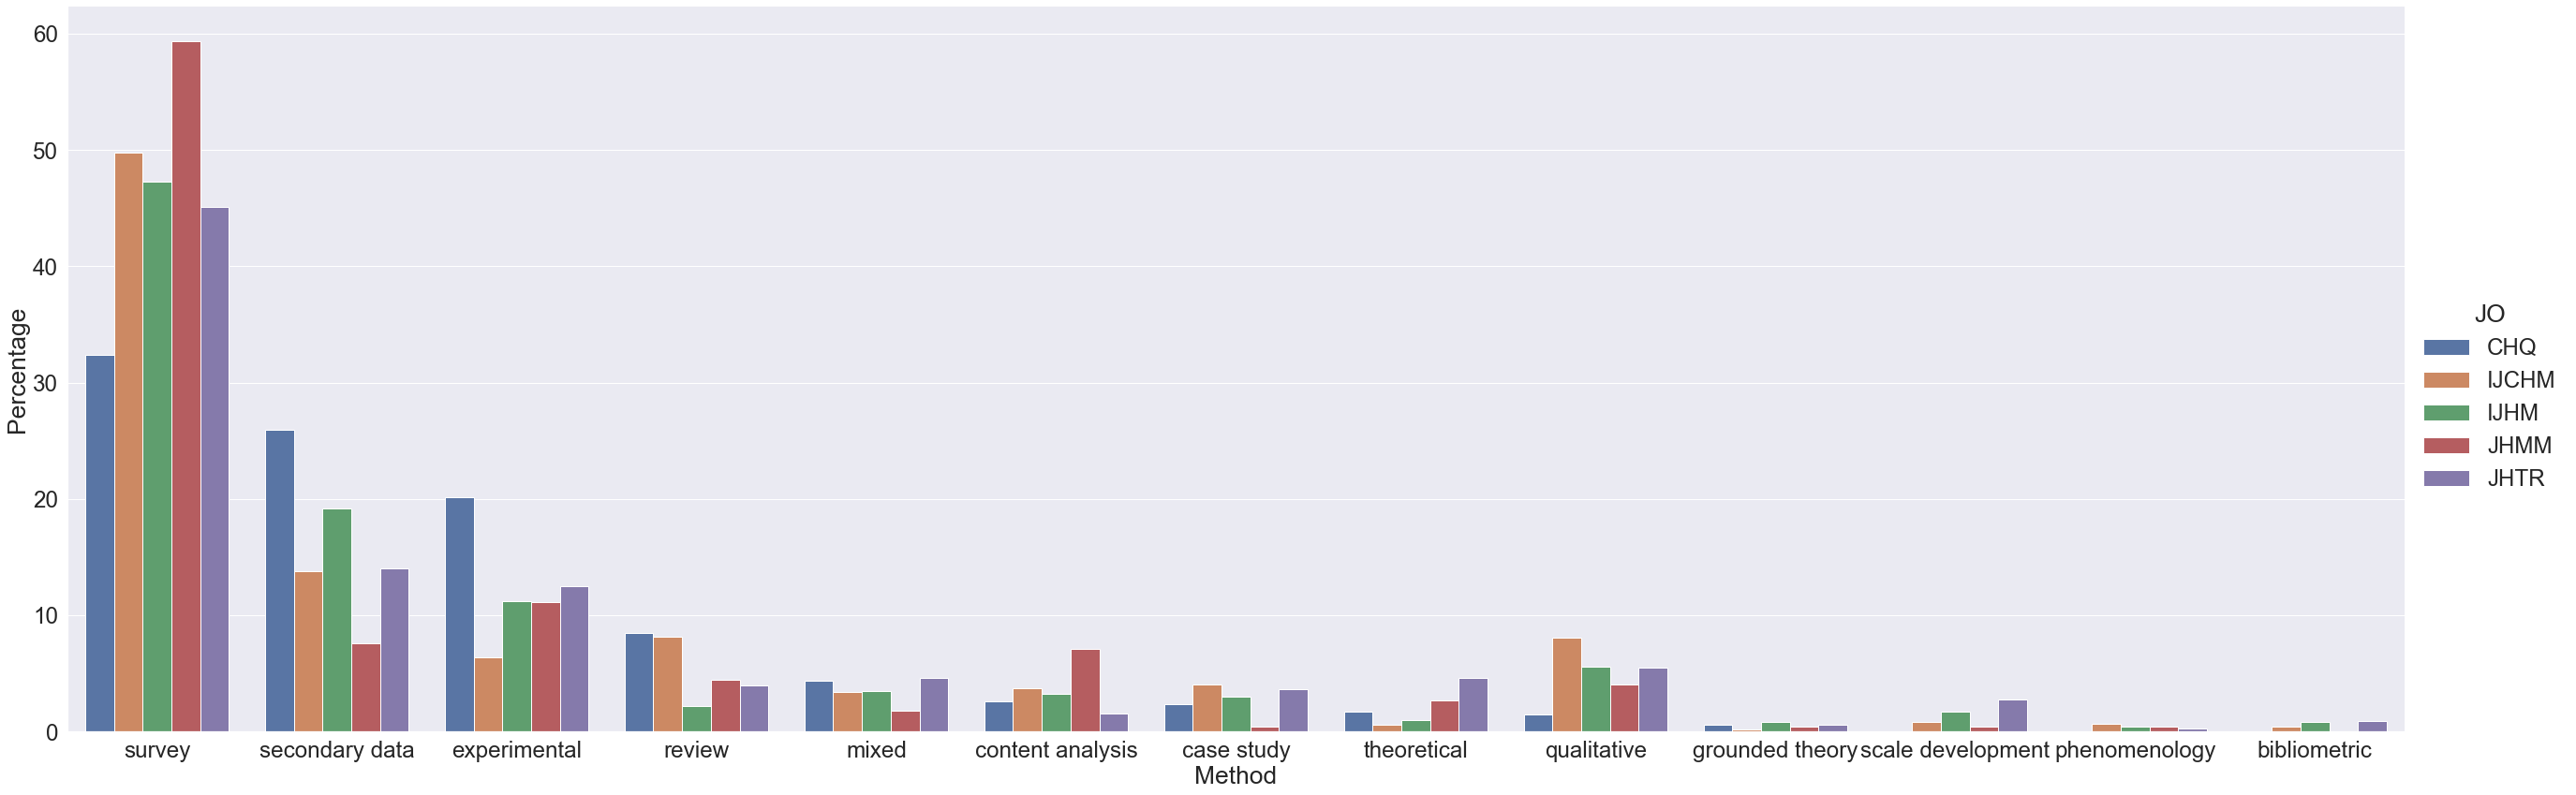

In [ ]:
sns.set(font_scale=2.2)

sns.catplot(x="Method", y= "Percentage", hue="JO", data=df_gr, kind="bar", height=12, aspect=3);